In [2]:
from import_functions_generic import * 
from import_functions_plotting import * 

from functions_background import *
from functions_derive_noise_map import *

In [24]:
L = time.localtime()
date = "{}-{}-{}".format(L[0],L[1],L[2],L[3],L[4],L[5])

saving_dir = 'figs/fig_v{}/comparison/'.format(date)
os.makedirs(saving_dir,exist_ok=True)

# Initialization

In [217]:
# Parameter files
im_crop_pca = 40
im_crop_mask = im_crop_pca
platescale=7.46
W_REF = [1.257, 1.271, 1.276]

In [353]:
# Colors
list_rainbow = ['navy','dodgerblue', 'skyblue','hotpink', 'red','orange','gold','seagreen']
colors_rainbow = seaborn.blend_palette(list_rainbow,10)
display(colors_rainbow)

list_colors = [list_rainbow[0], list_rainbow[1], list_rainbow[2], list_rainbow[4], list_rainbow[5]]
MARKERS_IFS = ['<','>','<','>','D','D','o']
MS_IFS = 5
COLORS_IFS = colors_rainbow

cmap_white = seaborn.blend_palette(['white', 'ivory'], as_cmap=True)
cmap = cmap_white

[(0.0, 0.0, 0.5019607843137255),
 (0.09042675893886969, 0.43404844290657446, 0.8847673971549405),
 (0.3388696655132642, 0.6953325643983084, 0.9578623606305267),
 (0.6862745098039217, 0.6758169934640522, 0.849673202614379),
 (1.0, 0.3697808535178776, 0.633910034602076),
 (1.0, 0.041983852364474994, 0.0719723183391),
 (1.0, 0.43137254901960836, 0.0),
 (1.0, 0.7377931564782777, 0.0),
 (0.8103652441368702, 0.7741791618608227, 0.07893886966551339),
 (0.1803921568627451, 0.5450980392156862, 0.3411764705882353)]

In [362]:
folder = 'figs/fig_v2023-6-16/*/'
root = 'table_spectrum_*.csv'

dF_list = glob(folder+root)
dF_list = np.sort(dF_list)

XLOC_ALL, YLOC_ALL = [], []

for i, f in enumerate(dF_list): 
    print('-','[{}]'.format(i), f[len(folder)-2:])
    
    xloc, yloc = select_string_between_characs(f,'=','_', 0),  select_string_between_characs(f,'=','p', 1)
    try: 
        XLOC_ALL.append(float(xloc))
        YLOC_ALL.append(float(xloc))
    except: pass

fn = dF_list[3]
epoch, instru = select_string_between_characs(fn,'_','_', 4),  select_string_between_characs(fn,'_','_', 5)
XLOC_ALL, YLOC_ALL = np.array(XLOC_ALL), np.array(YLOC_ALL)
XLOC_ALL, YLOC_ALL = XLOC_ALL.astype(float)-im_crop_pca, YLOC_ALL.astype(float)-im_crop_pca
print('\nThe epoch is {} and instrument {}.'.format(epoch, instru))

- [0] east/table_spectrum_2019-07-09_IFS_mask=fits_file_spatial_binning=1x1pix_spectral_binning=1.csv
- [1] east/table_spectrum_2019-07-09_IFS_mask=fits_file_spatial_binning=1x1pix_spectral_binning=2.csv
- [2] east/table_spectrum_2019-07-09_IFS_mask=fits_file_spatial_binning=1x1pix_spectral_binning=3.csv
- [3] loc_x=140_y=108pix/table_spectrum_2019-07-09_IFS_mask=circular_spatial_binning=1x1pix_spectral_binning=1.csv
- [4] loc_x=140_y=108pix/table_spectrum_2019-07-09_IFS_mask=circular_spatial_binning=1x1pix_spectral_binning=2.csv
- [5] loc_x=140_y=108pix/table_spectrum_2019-07-09_IFS_mask=circular_spatial_binning=1x1pix_spectral_binning=3.csv
- [6] loc_x=87.5_y=113pix/table_spectrum_2019-07-09_IFS_mask=circular_spatial_binning=1x1pix_spectral_binning=1.csv
- [7] loc_x=87.5_y=113pix/table_spectrum_2019-07-09_IFS_mask=circular_spatial_binning=1x1pix_spectral_binning=2.csv
- [8] loc_x=87.5_y=113pix/table_spectrum_2019-07-09_IFS_mask=circular_spatial_binning=1x1pix_spectral_binning=3.csv
-

In [201]:
# Example dataframe
dF = pd.read_csv(fn)
dF.columns

Index(['Unnamed: 0', 'wavelength (mic)', 'flux_star (W/m^2)', 'flux (W/m^2)',
       'flux_e (W/m^2)', 'contrast', 'contrast_e', 'flux (ADU/arcsec^2)',
       'flux_e (ADU/arcsec^2)'],
      dtype='object')

In [202]:
columns_dF = ['wavelength (mic)', 'flux_star (W/m^2)', 'flux (W/m^2)', 'flux_e (W/m^2)', 
              'contrast', 'contrast_e', 'flux (ADU/arcsec^2)']

In [203]:
dF.tail()

,Unnamed: 0,wavelength (mic),flux_star (W/m^2),flux (W/m^2),flux_e (W/m^2),contrast,contrast_e,flux (ADU/arcsec^2),flux_e (ADU/arcsec^2)
34,34,1.29422,1.492843e-08,4.779986e-18,6.367334e-18,3.201935e-10,4.265240e-10,0.000357,0.000475
35,35,1.30319,1.468796e-08,5.416223e-18,6.259762e-18,3.687527e-10,4.261834e-10,0.000421,0.000487
36,36,1.31197,1.438495e-08,6.592666e-18,7.010785e-18,4.583029e-10,4.873693e-10,0.000503,0.000535
37,37,1.32052,1.413144e-08,4.202913e-18,8.745378e-18,2.974157e-10,6.188595e-10,0.000283,0.000589
38,38,1.32884,1.388749e-08,7.444014e-18,1.599247e-17,5.360230e-10,1.151573e-09,0.000375,0.000806


# Plot Spectrum

In [364]:
index = np.array([0, 6, 9, 12, 3]) +didx
didx = 2
FNs = [dF_list[index[0]], dF_list[index[1]], dF_list[index[2]], dF_list[index[3]], dF_list[index[4]]] 
LABELS = ['East disk', 'East 1', 'East 2', 'West disk', 'West 1']
dFs = [pd.read_csv(fn) for fn in FNs]

# location
index_loc = np.arange(0,9,3)
XLOC, YLOC = XLOC_ALL[index_loc], YLOC_ALL[index_loc]

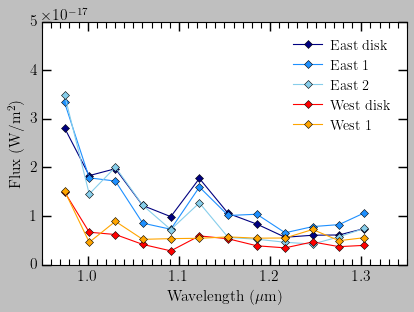

In [366]:
spatial_binning_factor, spectral_binning_factor = 1, 1+didx
col_X, col_Y, col_Y_err = columns_dF[0], columns_dF[2], columns_dF[3]
xlim = [0.95,1.35]
add_errorbar = 0
suffix=''

if add_errorbar: suffix = '_errorbar'

# Figure spectrum (flux (W/m^2))
namesave='comparaison_spectrum_fluxWm2_{}_{}_spatial_binning={}x{}pix_spectral_binning={}{}.pdf'.format(epoch, instru, 
                spatial_binning_factor, spatial_binning_factor,  spectral_binning_factor, suffix)


fig, ax = plt.subplots(1,1, figsize=(6,4))
fig.subplots_adjust(left=0.2,right=0.96,bottom=0.17,top=0.93)
ax.set_xlabel('Wavelength ($\mu$m)');  ax.set_ylabel('Flux (W/m$^2$)')

for i, dF in enumerate(dFs):
    X, Y, Y_err = np.array(dF[col_X]), np.array(dF[col_Y]), np.array(dF[col_Y_err])

    if add_errorbar:
        ax.errorbar(X, Y, Y_err, marker=MARKERS_IFS[4], ms=MS_IFS, capsize=2,
            label=LABELS[i], color=list_colors[i]) #, zorder=-i)
    
    else: ax.plot(X, Y, marker=MARKERS_IFS[4], ms=MS_IFS, label=LABELS[i], color=list_colors[i])

mise_en_page(ax,x_step=1, x_maj_step=0.1, x_min_step=0.01, y_step=0, y_maj_step=0.5, y_min_step=0.1)
ylim = ax.get_ylim()
ylim = [0,ylim[1]]
ylim = [0,5e-17]

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.legend(loc='best', numpoints=1, ncol=1, frameon=False)

plt.savefig(saving_dir+namesave)
plt.show()

# Plot image

In [341]:
# Image
didx = 2
fn_im = folder[:-2]+'im_binning_spatial=1x1pix_binning_spectral={}.fits'.format(didx+1)
IM = fits.getdata(fn_im)

# Image Mask
fn_im_mask = '/Users/desgranc/Documents/work/GitHub_clone/projects/HD102326/grater_diskfm_mcmc/inputs/mask_inner_belt_left_2019-07-09_IFS.fits'
IM_MASK = fits.getdata(fn_im_mask)[im_crop_mask:-im_crop_mask,im_crop_mask:-im_crop_mask]

In [342]:
def add_aperture(ax, IM, xloc_orig, yloc_orig, rcut_orig = 3, platescale=7.46, edgecolor='white',
                xdeb = 0.05, ydeb = 0.035, xlong = 0.3, ylong = 0.3, add_scalebar=1, add_label=0, label=''):
    print('Add circular aperture centered at ({},{})'.format(xloc_orig, yloc_orig))
    
    # Original Image
    circ = Circle((xloc_orig, yloc_orig), rcut_orig, edgecolor=edgecolor, fc='None', lw=0.5)
    ax.add_patch(circ)
    #if add_label: ax.text(xloc_orig,yloc_orig, label, color=edgecolor)
    
    # Insert
    rsize= 6
    xzoom_deb,  xzoom_fin = 1+int(xloc_orig-rsize), 1+int(xloc_orig+rsize)
    yzoom_deb,  yzoom_fin = 1+int(yloc_orig-rsize), 1+int(yloc_orig+rsize)

    size = (xzoom_fin-xzoom_deb, yzoom_fin-yzoom_deb) # pixels
    size_mid = (rsize+xloc_orig%1-1, rsize+yloc_orig%1-1)
    
    cutout = IM[yzoom_deb:yzoom_fin, xzoom_deb:xzoom_fin]
    axes2 = fig.add_axes([xdeb, ydeb, xlong, ylong]) # renvoie un objet Axes
    axes2.imshow(cutout, interpolation='nearest', origin='lower', vmax=vmax,vmin=-vmax, cmap='magma')
    axes2.axis('off')
    circ = Circle(size_mid, rcut_orig, edgecolor=edgecolor, fc='None', lw=0.5)
    axes2.add_patch(circ)
    rect = Rectangle((-0.5,-0.5), size[0], size[1], edgecolor='black', fc='None', lw=2)
    axes2.add_patch(rect)
    
    if add_label: 
        axes2.text(0.05,0.8,label,transform=axes2.transAxes,color=edgecolor,fontsize=11)
        #axes2.text(size_mid[0],size_mid[0],label, color=edgecolor)

    # Add scalebar in the insert
    if add_scalebar:
        scalebar_pix,  scalebar_leg = 10, '0.01"'
        size = scalebar_pix/(platescale)
        fp = FontProperties(size=12)
        scalebar = AnchoredSizeBar(axes2.transData, size, scalebar_leg, 1, label_top=True, pad=0.1,
                                       sep=1, borderpad=0.1, frameon=False, size_vertical=1, color='white', fontproperties=fp)
        axes2.add_artist(scalebar)
    return 

Add circular aperture centered at (47.5,73.0)
Add circular aperture centered at (54.0,73.0)
Add circular aperture centered at (100.0,68.0)
Size image mask (160, 160)


/var/folders/k2/sfv4r4z938l77n1t4ydth2v401phl2/T/ipykernel_84868/201336688.py:27: UserWarning: No contour levels were found within the data range.
  contours = ax.contour(XX, YY, imc, lvl_contours, color=list_colors[0], linewidths=0.5, linestyles='-')
/var/folders/k2/sfv4r4z938l77n1t4ydth2v401phl2/T/ipykernel_84868/201336688.py:27: UserWarning: The following kwargs were not used by contour: 'color'
  contours = ax.contour(XX, YY, imc, lvl_contours, color=list_colors[0], linewidths=0.5, linestyles='-')


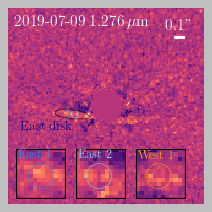

In [343]:
text = '{}~{}$\,\mu$m'.format(epoch, W_REF[didx])
namesave='comparaison_image_{}_{}_spatial_binning={}x{}pix_spectral_binning={}{}.pdf'.format(epoch, instru, 
                spatial_binning_factor, spatial_binning_factor,  didx+1, suffix)

vmax=np.nanmax(IM)

fig, ax = plot_fig(IM, add_colorbar=0, figsize=(2.5,2.5), add_text=1, text=text,
    do_tight_layout=1, flux_use_binning_factor=1, vmax=vmax, vmin=-vmax,  scalebar_loc=1,  scalebar_pad=0.3,
    namesave=namesave, saving_dir=saving_dir, 
    scalebar_leg='0.1"',  return_fig_ax=1)


# Add circular apertures on the image
xdeb = 0.05
for i in range(len(XLOC)):
    xloc_orig, yloc_orig = XLOC[i], YLOC[i]
    add_aperture(ax, IM, xloc_orig, yloc_orig, rcut_orig=3, platescale=7.46, edgecolor=list_colors[1+i], 
                xdeb=xdeb, xlong=0.25, ylong=0.25, add_scalebar=0, label=LABELS[1+i], add_label=1)
    xdeb+=0.3

# Add zone East disk
n_final = np.shape(IM_MASK)[-1]
imc = IM_MASK
print('Size image mask', np.shape(imc))
lvl_contours=0
XX, YY = np.arange(n_final), np.arange(n_final)
contours = ax.contour(XX, YY, imc, lvl_contours, color=list_colors[0], linewidths=0.5, linestyles='-')
ax.text(94-im_crop_pca-45, 113-im_crop_pca-13, LABELS[0], color=list_colors[0], fontsize=12)
    

    
fig.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01, wspace=0.02)
plt.savefig(saving_dir+namesave+'.pdf', dpi=300)